In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


This book contains most of the models run during investigation and hyperparameter tuning. Ones with particularly bad performance generally weren't saved.

In [0]:
# Set config option to enable autocomplete suggestions by tapping tab
# Ran across this option toward the end of the project - really handy!
%config IPCompleter.greedy=True

In [0]:
from os import getcwd, chdir
from pathlib import Path
#path = '/content/gdrive/Shared drives/IDS594/SavedModels'
path = '/content/gdrive/Shared drives/My Drive/IDS594project'
chdir(path)
print(getcwd())

# Create dicts to store model and history info
models=dict()
history=dict()

/content/gdrive/Shared drives/IDS594/SavedModels


In [0]:
# Functions to pickle and unpickle data
# In this book, used to load history data
import pickle
def unpickle(file):
  with open(file, 'rb') as fo:
      dict = pickle.load(fo, encoding='bytes')
      return dict

def savepickle(obj, file):
  with open(file, 'wb') as handle:
    pickle.dump(obj, handle)

In [0]:
#Define function to plot model history

import matplotlib.pyplot as plt

def plot_model(history):
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(1, len(acc) + 1)
  #print('First: Train Acc', acc[0], 'Val Acc', val_acc[0])
  #print('Half:  Train Acc', acc[int(len(acc)/2)], 'Val Acc', val_acc[int(len(acc)/2)], 'Epochs:',int(len(acc)/2))
  #print('Final: Train Acc', acc[-1], 'Val Acc', val_acc[-1], 'Epochs:',len(acc))
  print('First: Train Acc: {:.3f} Val Acc: {:.3f}'.format(acc[0], val_acc[0]))
  print('Half : Train Acc: {:.3f} Val Acc: {:.3f} Epochs: {:d}'.format(acc[int(len(acc)/2)], val_acc[int(len(acc)/2)], int(len(acc)/2)))
  print('Final: Train Acc: {:.3f} Val Acc: {:.3f} Epochs: {:d}'.format(acc[-1], val_acc[-1], len(acc)))
  fig = plt.figure(figsize=(15,5))
  plt.subplot(1,2,1)
  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.subplot(1,2,2)
  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
  plt.show()

In [0]:
# As a result of using the autocomplete setting, I was able to delve into the attributes of the model object to
# find the various settings. Not all of the pertinent ones are displayed as I figured this out toward the end.
# The title headings have more complete summaries of each model
def full_model_summary(model):
  print('Metrics:',models[key].metrics)
  print('Loss:',models[key].loss)
  print('Optimizer:',models[key].optimizer.__class__.__name__,'LR:',K.eval(models[key].optimizer.lr))
  for layer in models[key].layers:
    if 'dropout' in layer.name:
      layer_info = str('\tDropout Rate: {:.2f}'.format(layer.rate))
    elif 'conv' in layer.name:
      layer_info = str('\t\tL2 Reg: {:.3f}'.format(layer.kernel_regularizer.l2.item(0)))
    else:
      layer_info = ''
    print(layer.__class__.__name__,layer_info)

In [0]:
from keras.models import load_model
import keras.backend as K
import numpy as np

Using TensorFlow backend.


## Model 1 - SmallData

This model shows extreme overfitting, as was expected.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
batch_normalization_30 (Batc (None, 75, 75, 32)        128       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
batch_normalization_31 (Batc (None, 37, 37, 64)        256       
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 37, 37, 128)       204928    
__________

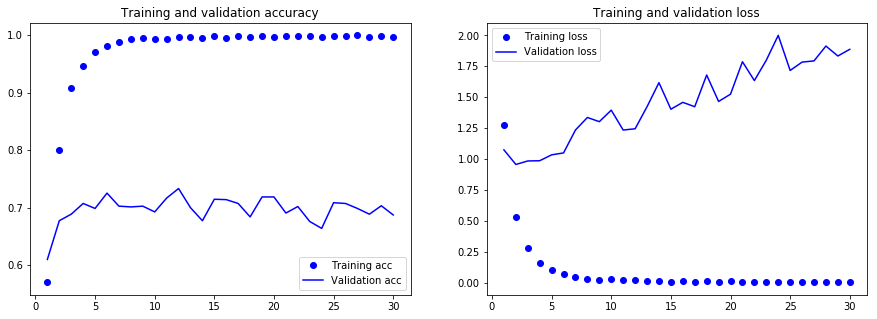

In [0]:
key=1
data='small'
models[key] = load_model(data+'data_model'+str(key)+'.h5')
history[key] = unpickle(data+'data_hist'+str(key))

models[key].summary()
#full_model_summary(models[key])
print()
plot_model(history[key])

As a starting point, it's clear that overfitting mitigation needs to be included. Also of note is that validation accuracy hovered around .7, which sets a target to beat.

## Model2 - SmallData

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
batch_normalization_42 (Batc (None, 75, 75, 32)        128       
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
batch_normalization_43 (Batc (None, 37, 37, 64)        256       
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 37, 37, 128)       204928    
__________

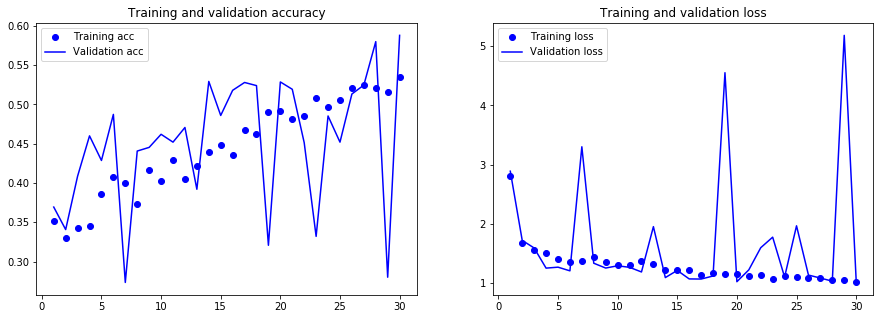

In [0]:
key=2
data='small'
models[key] = load_model(data+'data_model'+str(key)+'.h5')
history[key] = unpickle(data+'data_hist'+str(key))

models[key].summary()
#full_model_summary(models[key])
print()
plot_model(history[key])

The dropout is causing quite a bit of noise in validation accuracy, but there's still consistent improvement slope, so additional epochs would probably further increase validation accuracy without overfitting. 

## Model3 - SmallData, No DataAug

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
batch_normalization_45 (Batc (None, 75, 75, 32)        128       
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
batch_normalization_46 (Batc (None, 37, 37, 64)        256       
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 37, 37, 128)       204928    
__________

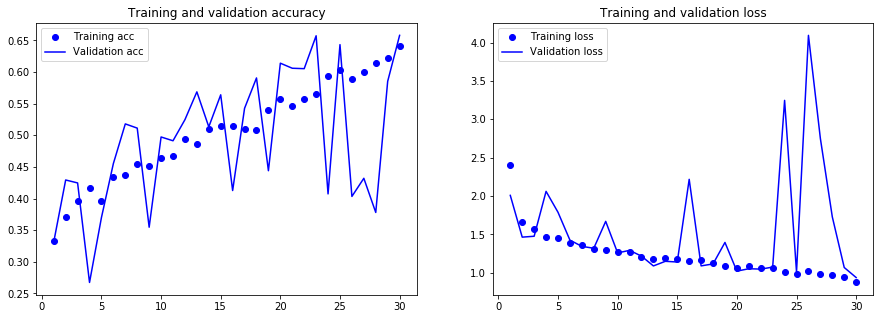

In [0]:
key=3
data='small'
models[key] = load_model(data+'data_model'+str(key)+'.h5')
history[key] = unpickle(data+'data_hist'+str(key))

models[key].summary()
#full_model_summary(models[key])
print()
plot_model(history[key])

Added a Dense16 between Dense64 and Dropout to try to calm the validation accuracy noise.

## Model4 - SmallData, No DataAug

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
batch_normalization_48 (Batc (None, 75, 75, 32)        128       
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
batch_normalization_49 (Batc (None, 37, 37, 64)        256       
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 37, 37, 128)       204928    
__________

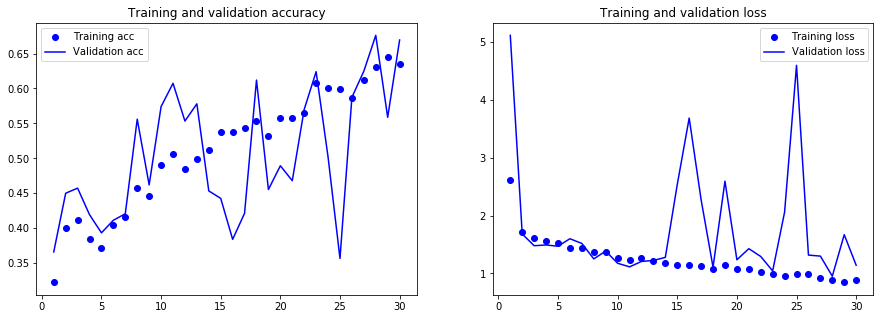

In [0]:
key=4
data='small'
models[key] = load_model(data+'data_model'+str(key)+'.h5')
history[key] = unpickle(data+'data_hist'+str(key))

models[key].summary()
#full_model_summary(models[key])
print()
plot_model(history[key])

Doubled Batchsize from 50 to 100 showing a small increase in validation accuracy

## Model5 - SmallData, No DataAug, Double final dense layer nodes

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_60 (Conv2D)           (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
batch_normalization_60 (Batc (None, 75, 75, 32)        128       
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
batch_normalization_61 (Batc (None, 37, 37, 64)        256       
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 37, 37, 128)       204928    
__________

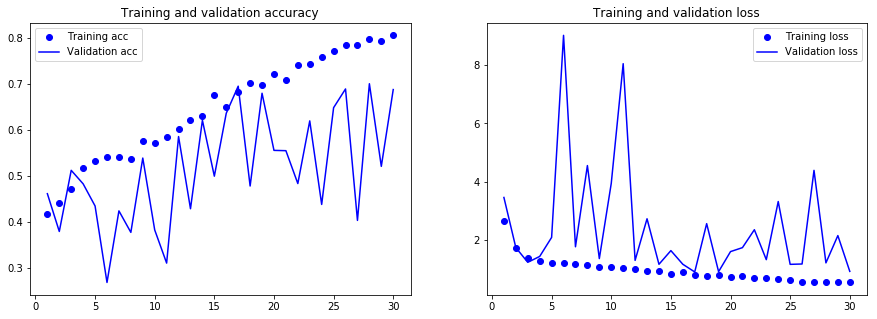

In [0]:
key=5
data='small'
models[key] = load_model(data+'data_model'+str(key)+'.h5')
history[key] = unpickle(data+'data_hist'+str(key))

models[key].summary()
#full_model_summary(models[key])
print()
plot_model(history[key])

Small val acc increase, still lots of noise. In retrospect, the noise was probably due to too much dropout.
At the time, I think I attributed it to batch norm, hence the next iteration

## Model6 - SmallData, L2Reg, No BatchNorm, No DataAug

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_63 (Conv2D)           (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_63 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_64 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 37, 37, 128)       204928    
_________________________________________________________________
max_pooling2d_65 (MaxPooling (None, 18, 18, 128)       0         
_________________________________________________________________
flatten_22 (Flatten)         (None, 41472)             0         
__________

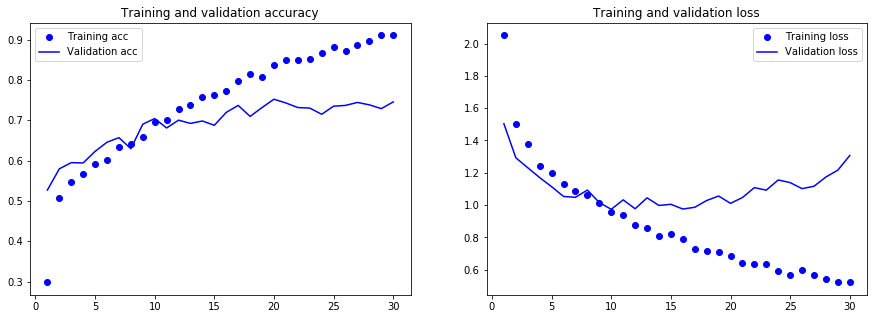

In [0]:
key=6
data='small'
models[key] = load_model(data+'data_model'+str(key)+'.h5')
history[key] = unpickle(data+'data_hist'+str(key))

models[key].summary()
full_model_summary(models[key])
print()
plot_model(history[key])

The smoothing and significant val acc gain seen here after shifting from BatchNorm to L2Reg was so impressive that I didn't really give BatchNorm another look. In retrospect, the increased val acc was probably due to the overfitting.Trying Data Aug next to address overfitting.

## Model7 - SmallData, L2Reg, DataAug, No BatchNorm

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_66 (Conv2D)           (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_66 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_67 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 37, 37, 128)       204928    
_________________________________________________________________
max_pooling2d_68 (MaxPooling (None, 18, 18, 128)       0         
_________________________________________________________________
flatten_23 (Flatten)         (None, 41472)             0         
__________

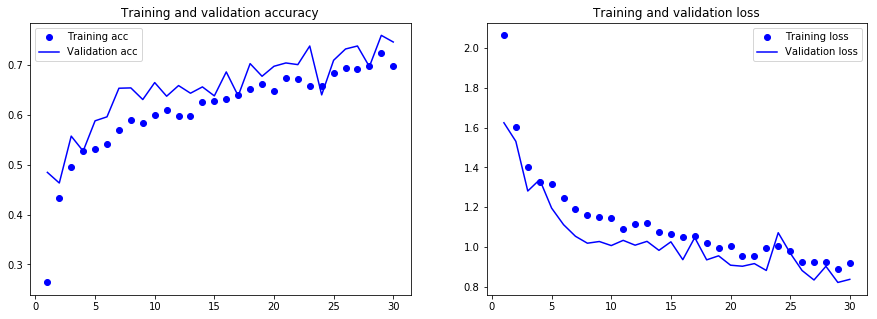

In [0]:
key=7
data='small'
models[key] = load_model(data+'data_model'+str(key)+'.h5')
history[key] = unpickle(data+'data_hist'+str(key))

models[key].summary()
full_model_summary(models[key])
print()
plot_model(history[key])

Good overfitting correction from Data Aug, so I kept using it for awhile

## Model8 - SmallData, DataAug, BatchNorm, No L2Reg
Results were really bad, so didn't save it. Basically, BatchNorm doesn't seem to work well at all for this data, or I'm using it poorly.

## Model9 - SmallData, DataAug, No BatchNorm, L2Reg, Pre Conv DropOuts

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_84 (Conv2D)           (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_84 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
dropout_27 (Dropout)         (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_85 (Conv2D)           (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_85 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 37, 37, 128)       204928    
__________

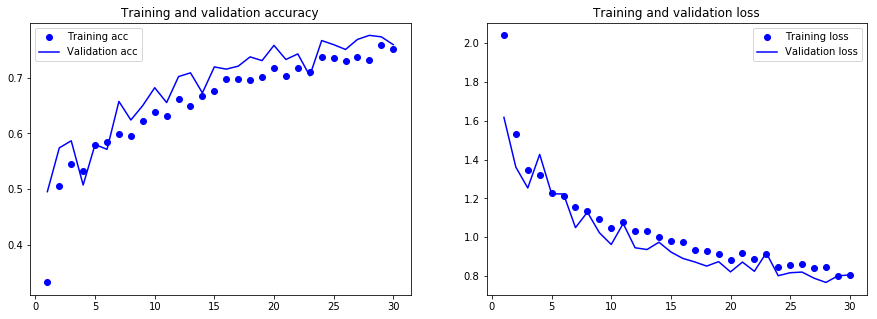

In [0]:
key=9
data='small'
models[key] = load_model(data+'data_model'+str(key)+'.h5')
history[key] = unpickle(data+'data_hist'+str(key))

models[key].summary()
full_model_summary(models[key])
print()
plot_model(history[key])

Looking around for other option, I found the idea of using Dropout before the Conv layers, but with a lower rate than in the final layers. In this first try, I just lowered the rate to .2 for all three Dropouts. Of note, this model looks like it would still improve over more epochs, or at least benefit from an increase learning rate.

## Model10 - SmallData, DataAug, L2Reg, MultDropOuts, AdamLR=.002

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_87 (Conv2D)           (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_87 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
dropout_30 (Dropout)         (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_88 (Conv2D)           (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_88 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_31 (Dropout)         (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_89 (Conv2D)           (None, 37, 37, 128)       204928    
__________

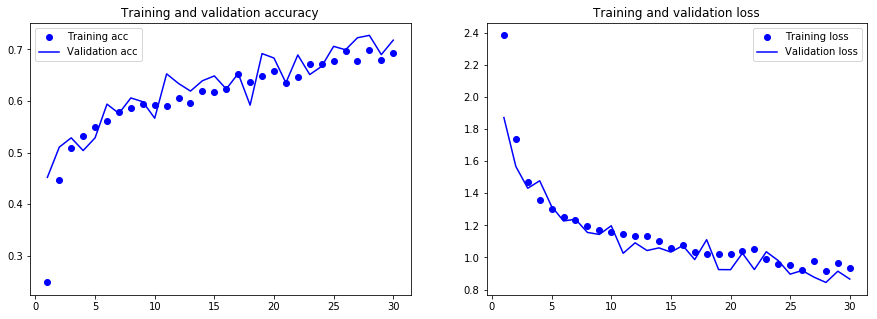

In [0]:
key=10
data='small'
models[key] = load_model(data+'data_model'+str(key)+'.h5')
history[key] = unpickle(data+'data_hist'+str(key))

models[key].summary()
full_model_summary(models[key])
print()
plot_model(history[key])

Tried increased learning rate with reduced val acc.

## Model11 - SmallData, DataAug, L2Reg, MultDropOuts, AdamLR=.003
Model not saved due to poor results, indicating no use in increasing LR further.

## Model12 - SmallData, DataAug, L2Reg, MultDropOuts, AdamLR=.0009

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_93 (Conv2D)           (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_93 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
dropout_36 (Dropout)         (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_94 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_37 (Dropout)         (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 37, 37, 128)       204928    
__________

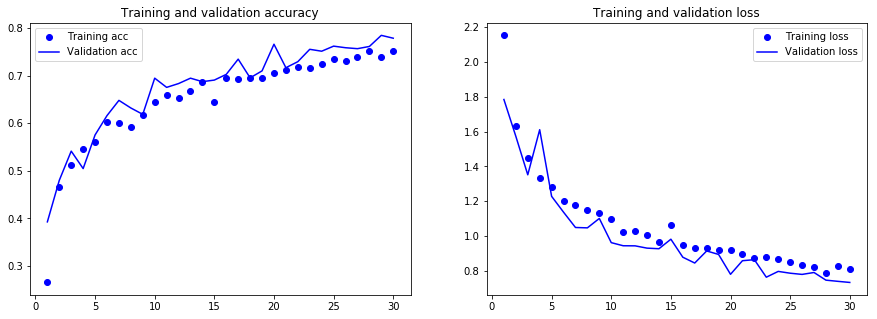

In [0]:
key=12
data='small'
models[key] = load_model(data+'data_model'+str(key)+'.h5')
history[key] = unpickle(data+'data_hist'+str(key))

models[key].summary()
full_model_summary(models[key])
print()
plot_model(history[key])

Now that I tried increasing LR, I tried reducing it with good results. In the future, I'd give consideration to increasing epochs for reduced LR as the slope doesn't appear to have leveled off yet.

## Model13 - SmallData, DataAug, L2Reg, MultDropOuts, AdamLR=.0008

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_96 (Conv2D)           (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_96 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
dropout_39 (Dropout)         (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_97 (Conv2D)           (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_97 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_40 (Dropout)         (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_98 (Conv2D)           (None, 37, 37, 128)       204928    
__________

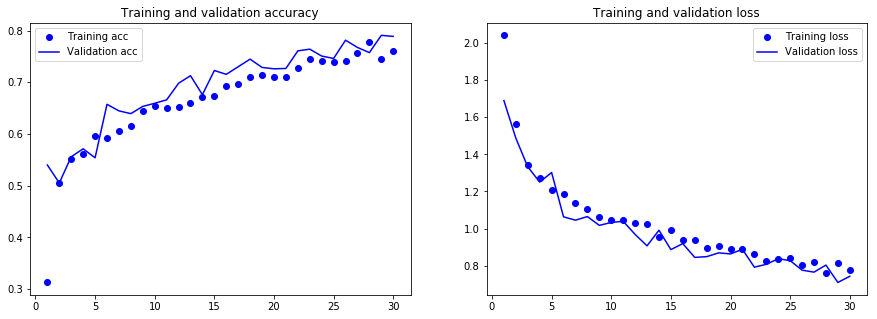

In [0]:
key=13
data='small'
models[key] = load_model(data+'data_model'+str(key)+'.h5')
history[key] = unpickle(data+'data_hist'+str(key))

models[key].summary()
full_model_summary(models[key])
print()
plot_model(history[key])

Best results yet. Likely to continue with LR=.0008 pending next LR trial.

## Model14 - SmallData, DataAug, L2Reg, MultDropOuts, AdamLR=.0007

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_99 (Conv2D)           (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_99 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
dropout_42 (Dropout)         (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_100 (Conv2D)          (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_100 (MaxPoolin (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_43 (Dropout)         (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_101 (Conv2D)          (None, 37, 37, 128)       204928    
__________

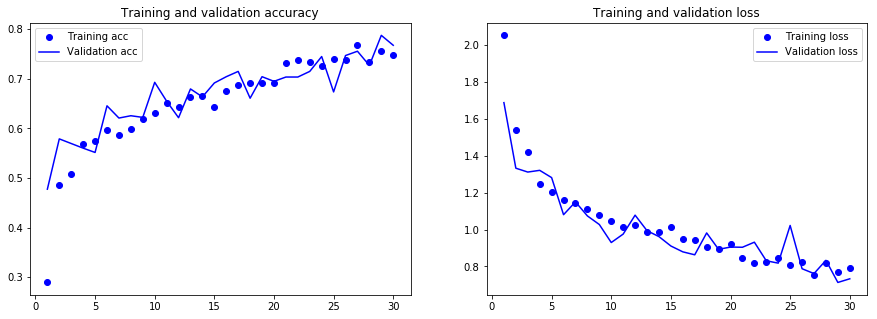

In [0]:
key=14
data='small'
models[key] = load_model(data+'data_model'+str(key)+'.h5')
history[key] = unpickle(data+'data_hist'+str(key))

models[key].summary()
full_model_summary(models[key])
print()
plot_model(history[key])

Good result, but LR=.0008 is better, so returning to that value. May revisit this LR range after shifting to fulldata

## Model15 - SmallData, DataAug, L2Reg=.002, MultDropOuts, AdamLR=.0008, 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 37, 128)       204928    
__________

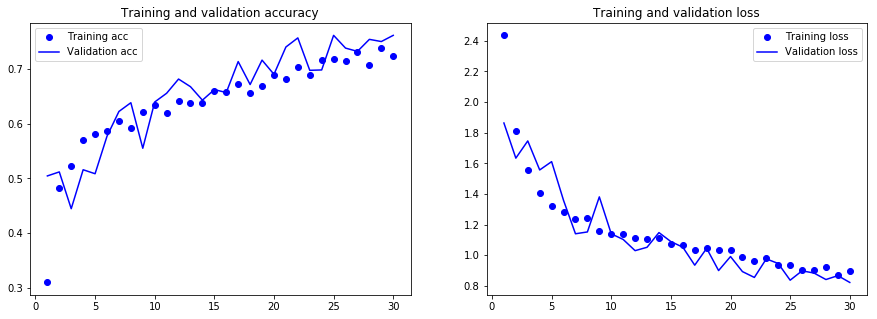

In [0]:
key=15
data='small'
models[key] = load_model(data+'data_model'+str(key)+'.h5')
history[key] = unpickle(data+'data_hist'+str(key))

models[key].summary()
full_model_summary(models[key])
print()
plot_model(history[key])

Worse results than default L2Reg, shifting to smaller values vs further investigation into larger ones

## Model16 - SmallData, DataAug, L2Reg=.0009, MultDropOuts, AdamLR=.0008, 

W0810 16:12:27.834476 140147695101824 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0810 16:12:27.892606 140147695101824 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0810 16:12:27.936399 140147695101824 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0810 16:12:27.939839 140147695101824 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:131: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0810 16:12:27.955312 140147695101824 deprecation_wrap

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 37, 37, 128)       204928    
__________

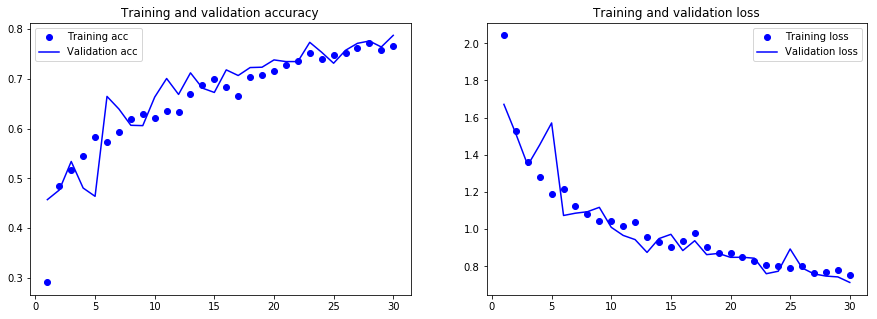

In [0]:
key=16
data='small'
models[key] = load_model(data+'data_model'+str(key)+'.h5')
history[key] = unpickle(data+'data_hist'+str(key))

models[key].summary()
full_model_summary(models[key])
print()
plot_model(history[key])

Smoother tracking between train and val acc with comparable best performance of ~78. Shifting to full data with this model config. Only realized later that 3rd conv layer L2reg had been zero'd out vs set to .0008

## Model17 - FullData, DataAug, L2Reg=.0008, MultDropOuts, AdamLR=.0008

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 37, 37, 128)       204928    
__________

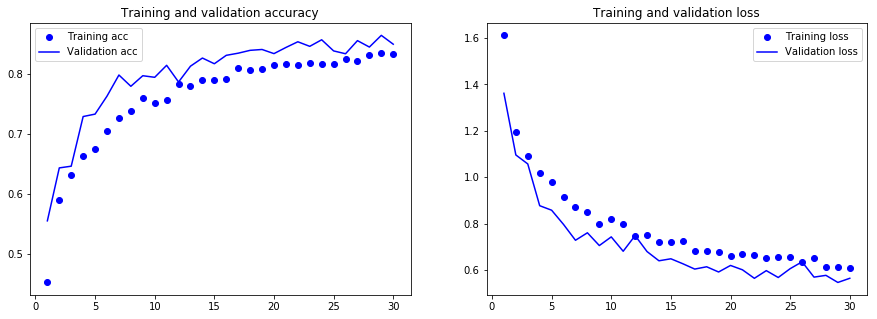

In [0]:
key=17
data='full'
models[key] = load_model(data+'data_model'+str(key)+'.h5')
history[key] = unpickle(data+'data_hist'+str(key))

models[key].summary()
full_model_summary(models[key])
print()
plot_model(history[key])

Immediate jump in val acc with increased size of full data. Later, saw a similar jump when training on all train+val data before running with held out test data.

## Model18 - FullData, DataAug, L2Reg=.0008, MultDropOuts, AdamLR=.0008, Double filter, dense nodes, and maxpool vals


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 150, 150, 64)      4864      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 37, 37, 128)       204928    
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 9, 9, 128)         0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 9, 9, 128)         0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 9, 9, 256)         819456    
__________

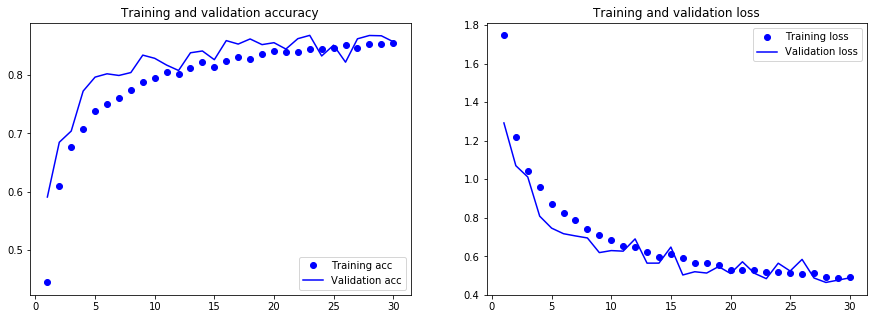

In [0]:
key=18
data='full'
models[key] = load_model(data+'data_model'+str(key)+'.h5')
history[key] = unpickle(data+'data_hist'+str(key))

models[key].summary()
full_model_summary(models[key])
print()
plot_model(history[key])

Small val acc bump from doubling filter and node counts and size of maxpool window. This increase even with a reduction of trainable params from 5.5M to 1.3M was very interesting. Especially as I was really noticing the slower model speed with full data and data aug, so I was very interested in fewer params with no sacrifice in val acc.

## Model19 - FullData, DataAug, L2Reg=.0008, MultDropOuts, AdamLR=.0008, 32/64/128 Conv, 128/128 Dense, 3/2/4 MP

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 150, 150, 32)      2432      
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 150, 150, 32)      25632     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
dropout_37 (Dropout)         (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 75, 75, 64)        51264     
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 75, 75, 64)        102464    
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 37, 37, 64)        0         
__________

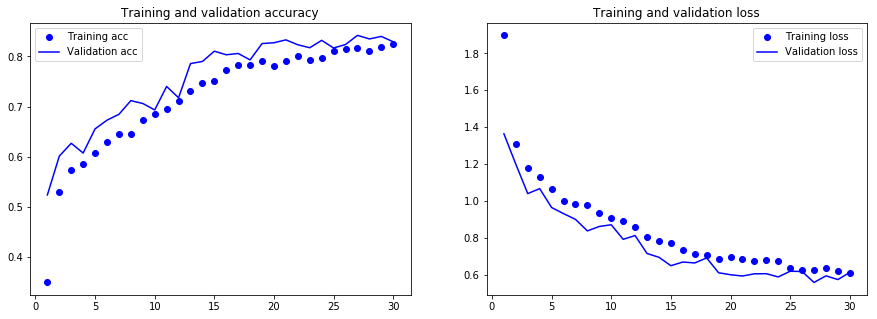

In [0]:
key=19
data='full'
models[key] = load_model(data+'data_model'+str(key)+'.h5')
history[key] = unpickle(data+'data_hist'+str(key))

models[key].summary()
full_model_summary(models[key])
print()
plot_model(history[key])

Back to 32/64/128 for simpler model but with MP designed for larger data going into Flatten to achive ~2M params. Also, finally noticed and fixed zero'd out L2Reg value. Drop in val acc so returned to 64/128/256 and adjusted MP to get 5x5 going into Flatten. Also reduced DO to .1/.2 as I wasn't seeing any overfitting. I had been avoiding changing multiple variables between models, but I was getting frustrated by the longer run time of full data (especially with Data Aug!)

## Model20 - FullData, DataAug, L2Reg=.0008, MultDropOuts=.1Conv,.2Dense, AdamLR=.0008, Double filter, dense nodes vals, maxpool 3/3/3

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_58 (Conv2D)           (None, 150, 150, 64)      4864      
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 50, 50, 64)        0         
_________________________________________________________________
dropout_46 (Dropout)         (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 50, 50, 128)       204928    
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 16, 16, 128)       0         
_________________________________________________________________
dropout_47 (Dropout)         (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 16, 16, 256)       819456    
__________

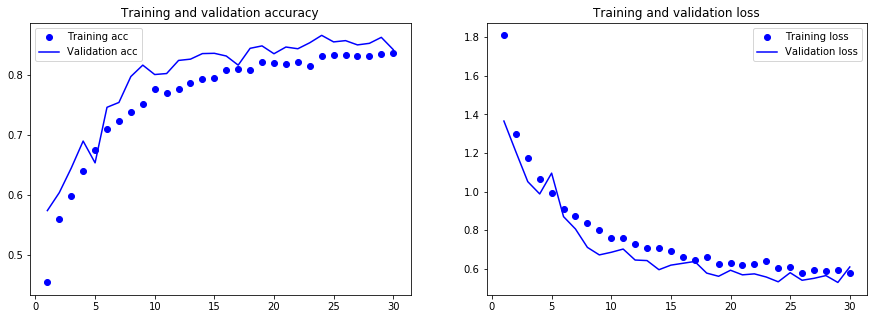

In [0]:
key=20
data='full'
models[key] = load_model(data+'data_model'+str(key)+'.h5')
history[key] = unpickle(data+'data_hist'+str(key))

models[key].summary()
full_model_summary(models[key])
print()
plot_model(history[key])

## Model21 - FullData, DataAug, L2Reg=.0008, MultDropOuts=.1Conv,.2Dense, AdamLR=.0008, Double filter, dense nodes vals, maxpool 3x3, RandNorm Kern&Bias Inits

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_64 (Conv2D)           (None, 150, 150, 64)      4864      
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 50, 50, 64)        0         
_________________________________________________________________
dropout_52 (Dropout)         (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 50, 50, 128)       204928    
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 16, 16, 128)       0         
_________________________________________________________________
dropout_53 (Dropout)         (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 16, 16, 256)       819456    
__________

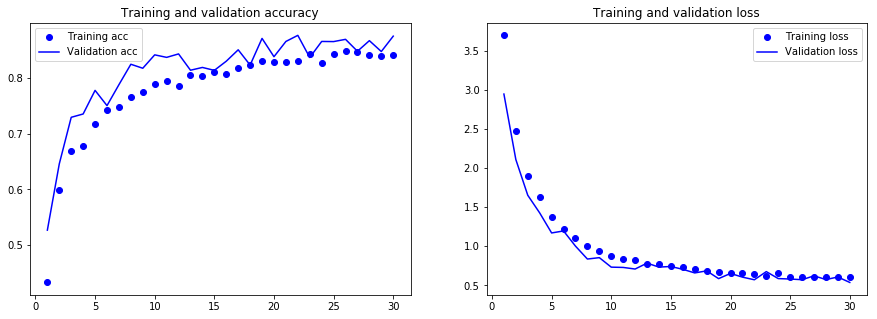

In [0]:
key=21
data='full'
models[key] = load_model(data+'data_model'+str(key)+'.h5')
history[key] = unpickle(data+'data_hist'+str(key))

models[key].summary()
full_model_summary(models[key])
print()
plot_model(history[key])

Recalled layer initialization and added kernal and bias Random Normal Initializers with default mean=0, stdev=.5 to all Conv layers with ~3% bump in val_acc. I never adjusted the init vals after.

## Model22 - FullData, NO DataAug, L2Reg=.0008, MultDropOuts=.1Conv,.2Dense, AdamLR=.0008, Double filter, dense nodes vals, maxpool 3/3/3, RandNorm Kern&Bias Inits

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_70 (Conv2D)           (None, 150, 150, 64)      4864      
_________________________________________________________________
max_pooling2d_58 (MaxPooling (None, 50, 50, 64)        0         
_________________________________________________________________
dropout_58 (Dropout)         (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 50, 50, 128)       204928    
_________________________________________________________________
max_pooling2d_59 (MaxPooling (None, 16, 16, 128)       0         
_________________________________________________________________
dropout_59 (Dropout)         (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 16, 16, 256)       819456    
__________

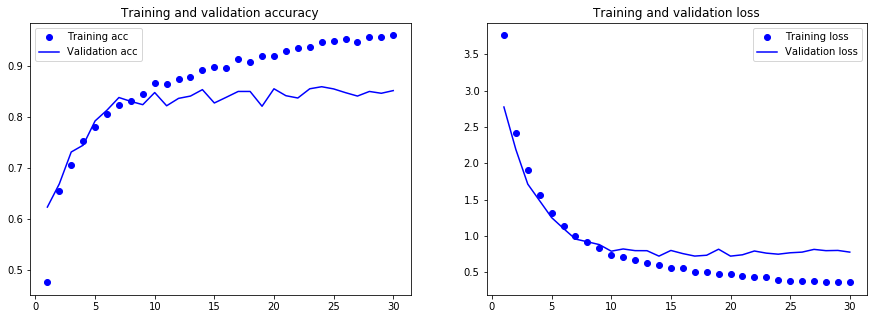

In [0]:
key=22
data='full'
models[key] = load_model(data+'data_model'+str(key)+'.h5')
history[key] = unpickle(data+'data_hist'+str(key))

models[key].summary()
full_model_summary(models[key])
print()
plot_model(history[key])

After getting more impatient with model speed w/ DataAug, wanted to try w/o resulting in
Clear overfitting along with plateau in val acc, trying inc L2Reg .0009->.002

## Model23 - FullData, NO DataAug, L2Reg=.002, MultDropOuts=.1Conv,.2Dense, AdamLR=.0008, Double filter, dense nodes vals, maxpool 3x3, RandNorm Kern&Bias Inits

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_73 (Conv2D)           (None, 150, 150, 64)      4864      
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 50, 50, 64)        0         
_________________________________________________________________
dropout_61 (Dropout)         (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 50, 50, 128)       204928    
_________________________________________________________________
max_pooling2d_62 (MaxPooling (None, 16, 16, 128)       0         
_________________________________________________________________
dropout_62 (Dropout)         (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 16, 16, 256)       819456    
__________

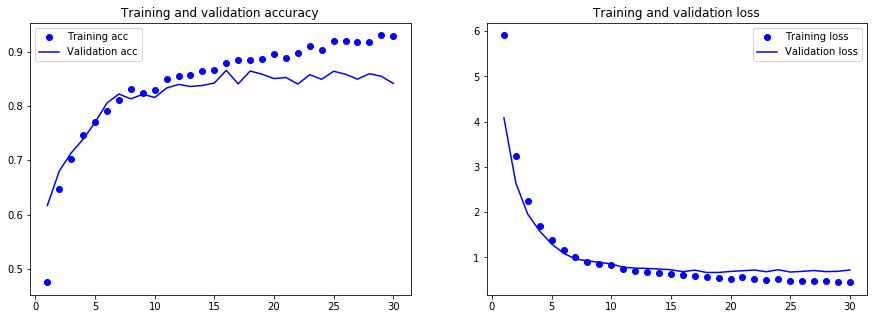

In [0]:
key=23
data='full'
models[key] = load_model(data+'data_model'+str(key)+'.h5')
history[key] = unpickle(data+'data_hist'+str(key))

models[key].summary()
full_model_summary(models[key])
print()
plot_model(history[key])

Small correction in overfitting, trying dropout .3/.5

## Model24 - FullData, NO DataAug, L2Reg=.002, MultDropOuts=.3Conv,.5Dense, AdamLR=.0008, Double filter, dense nodes vals, maxpool 3x3, RandNorm Kern&Bias Inits

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_76 (Conv2D)           (None, 150, 150, 64)      4864      
_________________________________________________________________
max_pooling2d_64 (MaxPooling (None, 50, 50, 64)        0         
_________________________________________________________________
dropout_64 (Dropout)         (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 50, 50, 128)       204928    
_________________________________________________________________
max_pooling2d_65 (MaxPooling (None, 16, 16, 128)       0         
_________________________________________________________________
dropout_65 (Dropout)         (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 16, 16, 256)       819456    
__________

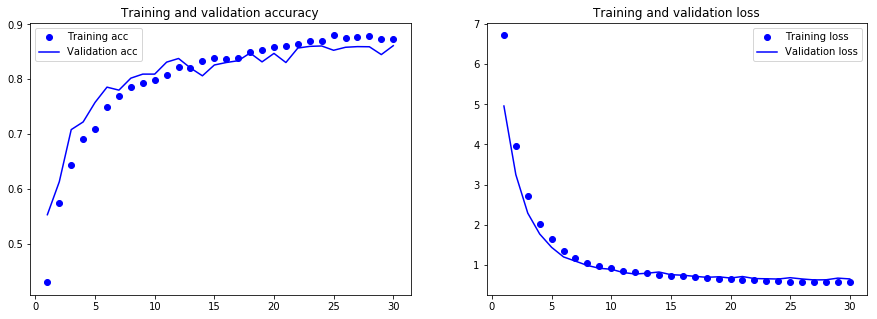

In [0]:
key=24
data='full'
models[key] = load_model(data+'data_model'+str(key)+'.h5')
history[key] = unpickle(data+'data_hist'+str(key))

models[key].summary()
full_model_summary(models[key])
print()
plot_model(history[key])

Quite satisfied with response to increased L2Reg and Dropout after removing DataAug. Val acc was ~1% less, but with faster model time, I figured that I could tune to make that up.

## Model25 - FullData, NO DataAug, L2Reg=.002, MultDropOuts=.3Conv,.5Dense, AdamLR=.0008, Double filter, dense nodes vals, maxpool 3x3, RandNorm Kern&Bias Inits, Filter 3x3

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_79 (Conv2D)           (None, 150, 150, 64)      1792      
_________________________________________________________________
max_pooling2d_67 (MaxPooling (None, 50, 50, 64)        0         
_________________________________________________________________
dropout_67 (Dropout)         (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 50, 50, 128)       73856     
_________________________________________________________________
max_pooling2d_68 (MaxPooling (None, 16, 16, 128)       0         
_________________________________________________________________
dropout_68 (Dropout)         (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 16, 16, 256)       295168    
__________

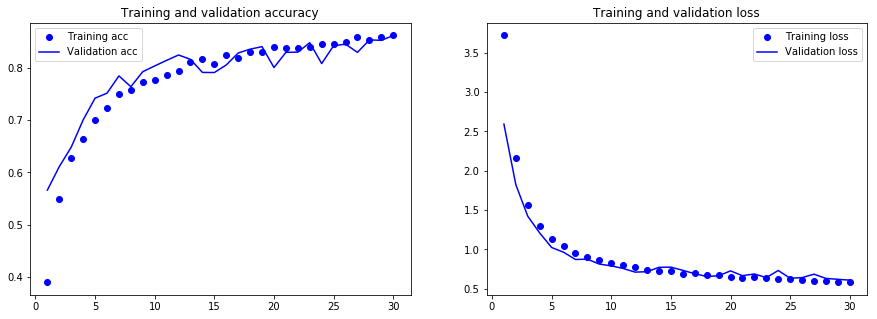

In [0]:
key=25
data='full'
models[key] = load_model(data+'data_model'+str(key)+'.h5')
history[key] = unpickle(data+'data_hist'+str(key))

models[key].summary()
full_model_summary(models[key])
print()
plot_model(history[key])

At this point Filter size had been 5x5 for all models. Here tried 3x3 with no change in val acc, but fewer params

## Model26 - FullData, NO DataAug, L2Reg=.002, MultDropOuts=.3Conv,.5Dense, AdamLR=.0008, Double x2 filter, dense nodes vals 128/256/512, 512/512, maxpool 3/5/5, RandNorm Kern&Bias Inits, Filter 3x3

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_100 (Conv2D)          (None, 150, 150, 128)     3584      
_________________________________________________________________
max_pooling2d_88 (MaxPooling (None, 75, 75, 128)       0         
_________________________________________________________________
dropout_88 (Dropout)         (None, 75, 75, 128)       0         
_________________________________________________________________
conv2d_101 (Conv2D)          (None, 75, 75, 256)       295168    
_________________________________________________________________
max_pooling2d_89 (MaxPooling (None, 15, 15, 256)       0         
_________________________________________________________________
dropout_89 (Dropout)         (None, 15, 15, 256)       0         
_________________________________________________________________
conv2d_102 (Conv2D)          (None, 15, 15, 512)       1180160   
__________

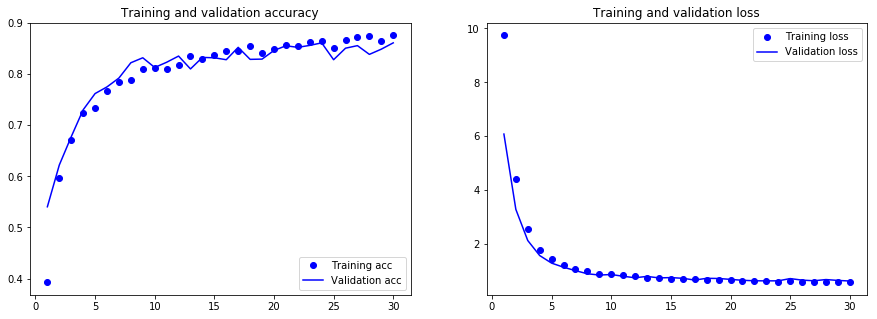

In [0]:
key=26
data='full'
models[key] = load_model(data+'data_model'+str(key)+'.h5')
history[key] = unpickle(data+'data_hist'+str(key))

models[key].summary()
full_model_summary(models[key])
print()
plot_model(history[key])

More filters and nodes but no change in val acc. Also, started adjusting MP vals to always divide evenly into previous output dimensions

## Model27 - FullData, NO DataAug, L2Reg=.002, MultDropOuts=.3Conv,.5Dense, AdamLR=.0008, Double filter, dense nodes vals 128/128/256, 256/256, maxpool 3/5/2, RandNorm Kern&Bias Inits, Filter 3x3

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_145 (Conv2D)          (None, 150, 150, 128)     9728      
_________________________________________________________________
max_pooling2d_133 (MaxPoolin (None, 50, 50, 128)       0         
_________________________________________________________________
dropout_133 (Dropout)        (None, 50, 50, 128)       0         
_________________________________________________________________
conv2d_146 (Conv2D)          (None, 50, 50, 128)       409728    
_________________________________________________________________
max_pooling2d_134 (MaxPoolin (None, 10, 10, 128)       0         
_________________________________________________________________
dropout_134 (Dropout)        (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_147 (Conv2D)          (None, 10, 10, 256)       819456    
__________

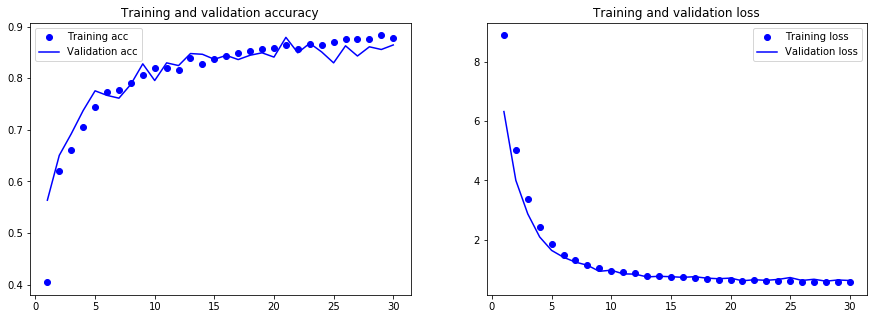

In [0]:
key=27
data='full'
models[key] = load_model(data+'data_model'+str(key)+'.h5')
history[key] = unpickle(data+'data_hist'+str(key))

models[key].summary()
full_model_summary(models[key])
print()
plot_model(history[key])

First try at same filter number for 1st and 2nd Conv

## Model28 - FullData, NO DataAug, L2Reg=.002, MultDropOuts=.3Conv,.5Dense, AdamLR=.0008, Double filter, dense nodes vals, maxpool 3x3, RandNorm Kern&Bias Inits, Filter 3x3

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 150, 150, 128)     9728      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 50, 50, 128)       0         
_________________________________________________________________
dense_16 (Dense)             (None, 50, 50, 128)       16512     
_________________________________________________________________
dense_17 (Dense)             (None, 50, 50, 4)         516       
_________________________________________________________________
dropout_10 (Dropout)         (None, 50, 50, 4)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 50, 50, 128)       12928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 10, 10, 128)       0         
__________

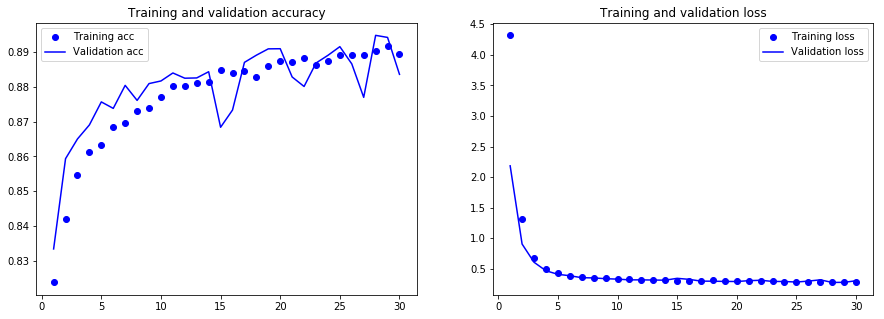

In [0]:
# Based on research, I tried a configuration as if classes were non-exclusive, which yielded much higher accuracy
# But further reading indicated that this approach was entirely incorrect!
key=28
data='full'
models[key] = load_model(data+'data_model'+str(key)+'.h5')
history[key] = unpickle(data+'data_hist'+str(key))

models[key].summary()
full_model_summary(models[key])
print()
plot_model(history[key])

This one is based on gross conceptual error! While trying to replicate aspects of a paper about using categorical hierachies by inserting a large Dense layer followed by a classification dense layer with desired number of categories, I also shifted the losses to binary crossentropy as the paper had done, but the paper was working with non-exclusive classes, while we have exclusive classess. Unfortunately, the binary cross entropy accuracy calculation yields really high (erroneous) accuracies, so in my excitement, I ran several more models with those settings before realizing my error.

Ultimately, Model 27 was used as final, but with categorical (ie one-hot) label encoding vs sparse categorical encoding

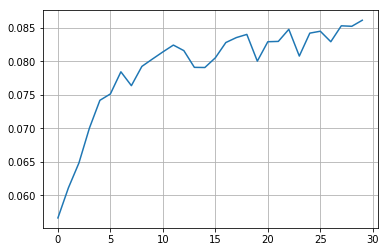

In [0]:
# Small experiment to determine what were good early stop points for models based on past model performance
# basic takeaway was that if 80% wsn't reached by 10 epochs, the model could probably be stopped, with the caveat that
# I expected adjusting LR to also adjust the convergence
avg=list()

for i in range(30):
  for k in history.keys():
    sum=0
    sum+=history[k].history['val_acc'][i]
  avg.append(sum/len(history.keys()))
avg

plt.plot(range(30),avg)
plt.grid(True)

In [0]:
for k in history.keys():
    print(history[k].history['val_acc'][-1])

0.8494419403015024
0.8575160321218898
0.8290192340479642
0.8425552121847266
0.7873333295186361
0.8743766340159713
0.8508667794267006
0.8413678439092082
0.8610781308195422
0.861315599319573


The last part is experimenting with Model27 while other model iterations were running in another notebook.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_145 (Conv2D)          (None, 150, 150, 128)     9728      
_________________________________________________________________
max_pooling2d_133 (MaxPoolin (None, 50, 50, 128)       0         
_________________________________________________________________
dropout_133 (Dropout)        (None, 50, 50, 128)       0         
_________________________________________________________________
conv2d_146 (Conv2D)          (None, 50, 50, 128)       409728    
_________________________________________________________________
max_pooling2d_134 (MaxPoolin (None, 10, 10, 128)       0         
_________________________________________________________________
dropout_134 (Dropout)        (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_147 (Conv2D)          (None, 10, 10, 256)       819456    
__________

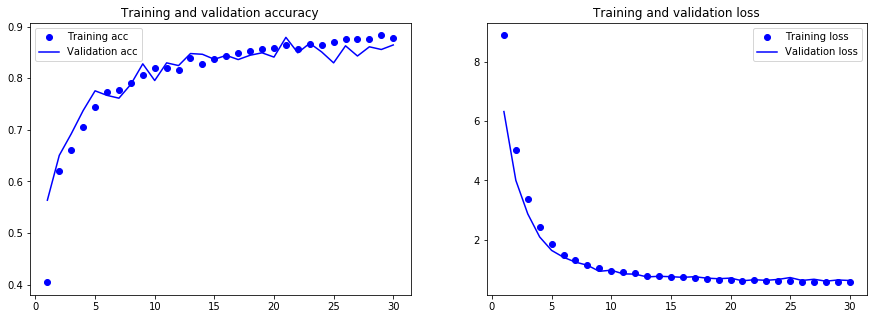

In [0]:
key=27
data='full'
models[key] = load_model(data+'data_model'+str(key)+'.h5')
history[key] = unpickle(data+'data_hist'+str(key))

models[key].summary()
full_model_summary(models[key])
print()
plot_model(history[key])

In [0]:
# Functions to display confusion matrices developed from examples in Matplotlib docs.

from sklearn.metrics import confusion_matrix
import numpy as np
from matplotlib import image
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized")
    #else:
        #print('Not Normalized')

    #print(cm)
    fig, ax = plt.subplots()
    #fig = plt.figure(figsize=(15,5))
    #plt.subplot(1,2,1)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
            
    fig.tight_layout()
    return ax

In [0]:
from keras.preprocessing.image import ImageDataGenerator
train_dir = '/content/full_data/train'
validation_dir = '/content/full_data/validation'
test_dir = '/content/full_data/test'

In [0]:
label_names = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
train_datagen = ImageDataGenerator(rescale=1./255)

"""
# Generator used for Data Augmentation models. Similar to Cat v Dog settings,
# but reduced rotation to 10 to smooth out extreme variation seen in model
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
"""

val_datagen = ImageDataGenerator(rescale=1./255)

BATCH_SIZE = 100

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    seed=0)

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    shuffle=False)

# Given batch size in above generators, the required step sizes to cycle through all train and val data are:
train_size = sum([len(list(Path(train_dir,label).iterdir())) for label in label_names])
val_size = sum([len(list(Path(validation_dir,label).iterdir())) for label in label_names])

steps_per_epoch = train_size / BATCH_SIZE
validation_steps = val_size / BATCH_SIZE
print(steps_per_epoch)
print(validation_steps)

Found 9830 images belonging to 6 classes.
Found 4211 images belonging to 6 classes.
98.3
42.11


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_145 (Conv2D)          (None, 150, 150, 128)     9728      
_________________________________________________________________
max_pooling2d_133 (MaxPoolin (None, 50, 50, 128)       0         
_________________________________________________________________
dropout_133 (Dropout)        (None, 50, 50, 128)       0         
_________________________________________________________________
conv2d_146 (Conv2D)          (None, 50, 50, 128)       409728    
_________________________________________________________________
max_pooling2d_134 (MaxPoolin (None, 10, 10, 128)       0         
_________________________________________________________________
dropout_134 (Dropout)        (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_147 (Conv2D)          (None, 10, 10, 256)       819456    
__________

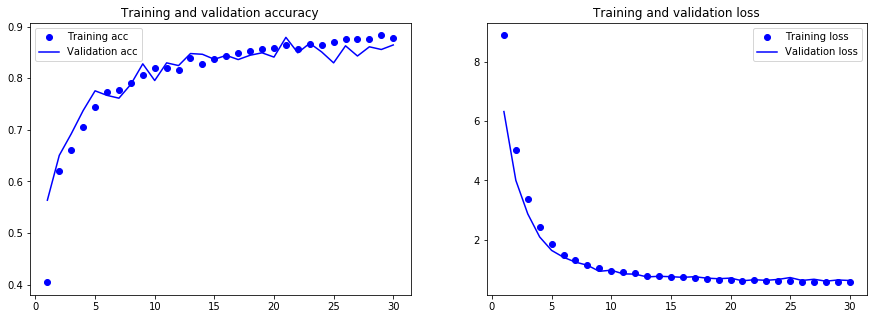

In [0]:
key=27
models[key].summary()
full_model_summary(models[key])
print()
plot_model(history[key])

In [0]:
key=27
test_labels = validation_generator.labels
test_images = np.array([image.imread(fpath) for fpath in validation_generator.filepaths])
predictions = models[key].predict_generator(validation_generator, steps=validation_steps)
pred_labels = np.argmax(predictions, axis = 1)

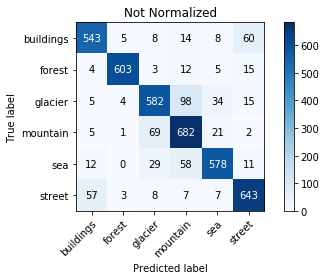

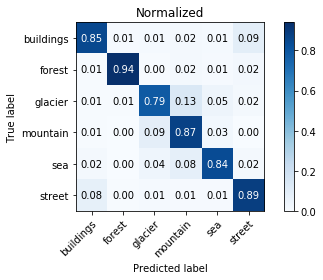

In [0]:
# Note the mountain/glacier, building/street, sea/glacier confusion. 
plot_confusion_matrix(test_labels, pred_labels, classes=label_names, title='Not Normalized')
plot_confusion_matrix(test_labels, pred_labels, classes=label_names, normalize=True, title='Normalized')